In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

import cv2
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import scipy.sparse as sparse
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding, TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib import offsetbox
import joblib
import pickle
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# About the Dataset

The training dataset is saved as a ```numpy``` array and contains a total of 6720 images from 10 classes. Each image is in grayscale and of size $300\times 300$. The 10 classes and its label encoding are:

| Character | a | b | c | d | e | f | g | h | $ | # |
| ----      | --| --| --| --| --| --| --| --| --| --|
| Label     |  0| 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |

In [ ]:
class_names = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', '$', '#']

Let's visualize the dataset:

In [2]:
# Loading Training Data
X_train = np.load('data_train.npy').T
t_train = np.load('labels_train.npy')
X_test = np.load('data_test.npy').T
t_test = np.load('labels_test.npy')

# Define the new size
new_size = (50, 50)

# Function to resize an image
def resize_image(image, new_size):
    resized_image = cv2.resize(image, new_size)
    return resized_image

# Reshape the training data
X_train = np.array([resize_image(image.reshape(300, 300), new_size).flatten() for image in X_train])
X_test = np.array([resize_image(image.reshape(300, 300), new_size).flatten() for image in X_test])

# Load files to test.ipynb
with open('X_test.pkl', 'wb') as file:
    pickle.dump(X_test, file)
with open('t_test.pkl', 'wb') as file:
    pickle.dump(t_test, file)

print(X_train.shape, t_train.shape, X_test.shape, t_test.shape)

(6720, 2500) (6720,) (2880, 2500) (2880,)


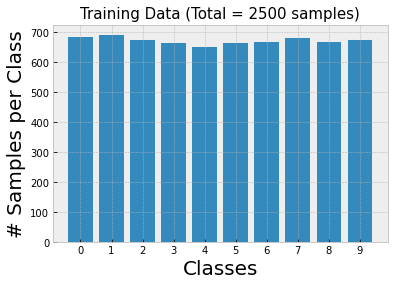

In [3]:
# Counting number samples per class
vals, counts = np.unique(t_train, return_counts=True)

plt.bar(vals, counts)
plt.xticks(range(10),range(10))
plt.xlabel('Classes',size=20)
plt.ylabel('# Samples per Class', size=20)
plt.title('Training Data (Total = '+str(X_train.shape[1])+' samples)',size=15);

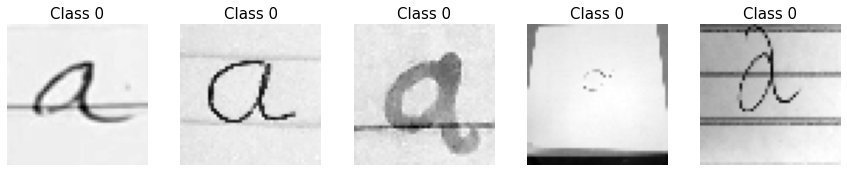

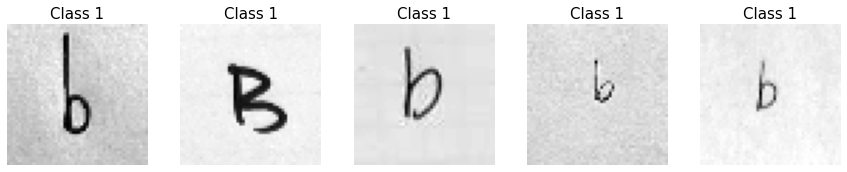

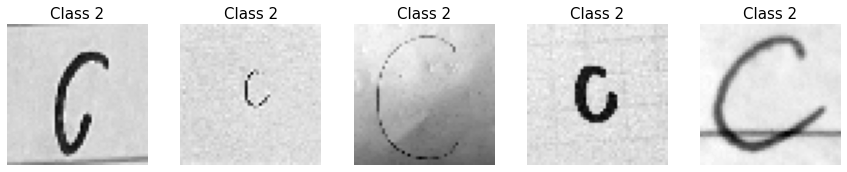

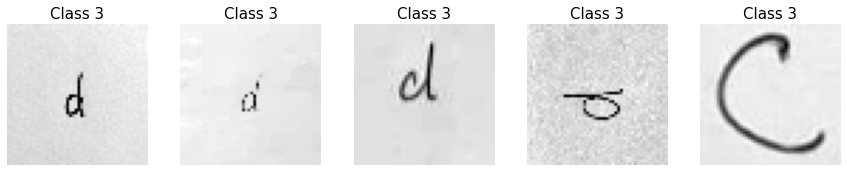

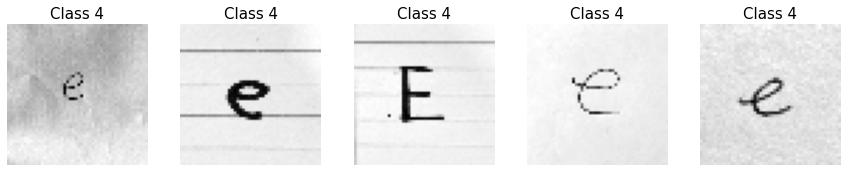

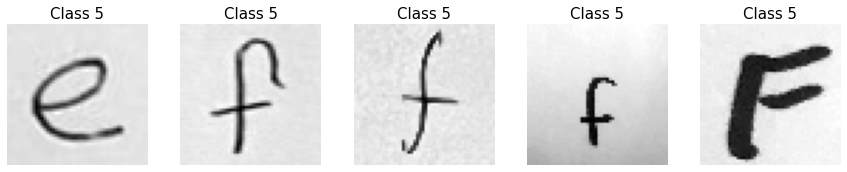

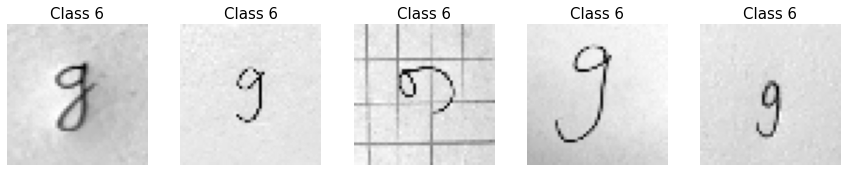

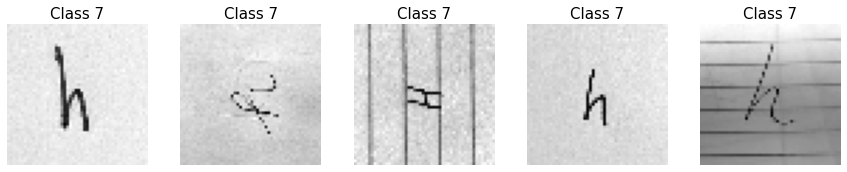

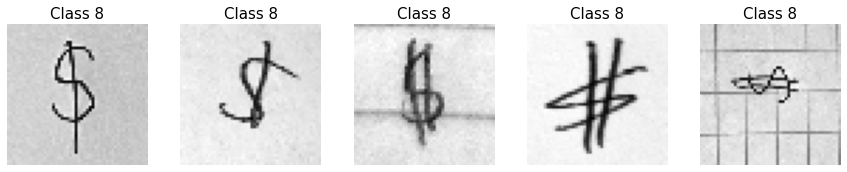

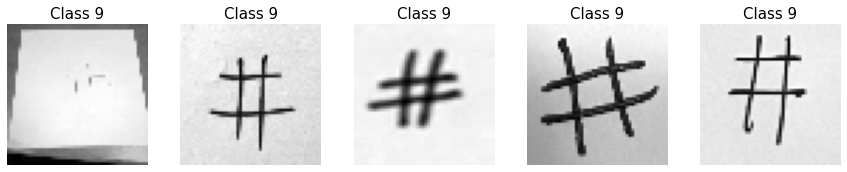

In [7]:
# Displaying some random examples per class

for i in range(0,10):
    rnd_sample = npr.permutation(np.where(t_train==i)[0])
    fig=plt.figure(figsize=(15,15))
    for j in range(5):
        fig.add_subplot(5,5,j+1)
        plt.imshow(X_train[rnd_sample[j],:].reshape((50,50)),cmap='gray')
        plt.axis('off');plt.title('Class '+str(int(t_train[rnd_sample[j]])),size=15)
    plt.show()
    print('\n\n')

# Assignment

**1. Implement Recursive Feature Elimination (RFE) to select the subset of features. Experiment with at least 2 different estimators.**

RFE with Logistic Regression

In [3]:
lr = LogisticRegression()
rfe_lr = RFE(estimator=lr)
rfe_lr.fit(X_train,t_train)
joblib.dump(rfe_lr,'rfe_lr.pkl')

['rfe_lr.pkl']

RFE with Random Forest

In [14]:
rf = RandomForestClassifier()
rfe_rf = RFE(estimator=rf)
rfe_rf.fit(X_train,t_train)
joblib.dump(rfe_rf,'rfe_rf.pkl')

['rfe_rf.pkl']

**2. Implement Principal Component Analysis (PCA) to select the number of components that explain at least 90% of the explained variance.**

In [4]:
n_components = 2500

# Create a pipeline with MinMaxScaler and PCA
pca_init = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=n_components)),
])

X_train_transformed = pca_init.fit_transform(X_train)
joblib.dump(pca_init,'pca_init.pkl')

['pca_init.pkl']

In [5]:
pca = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=161)),
])

X_train_transformed = pca.fit_transform(X_train)
joblib.dump(pca,'pca.pkl')

['pca.pkl']

**Train a classifier on the original dataset and the reduced dataset.**

Create logistic regression classifier with PCA

In [6]:
lr_pca = Pipeline([
    ('pca', pca),
    ('scaler', MinMaxScaler()),
    ('classifier', LogisticRegression(max_iter=5000))
])
lr_pca.fit(X_train, t_train)
joblib.dump(lr_pca,'lr_pca.pkl')

['lr_pca.pkl']

Create logistic regression classifier without PCA

In [7]:
lr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', LogisticRegression(max_iter=5000))
])
lr.fit(X_train, t_train)
joblib.dump(lr,'lr.pkl')

['lr.pkl']

**3. Use Fisher's Linear Discriminant Analysis (LDA) and t-SNE to reduce the dataset to 2-dimensions and visualize it.**

In [8]:
# Create a pipeline for LDA with Min-Max scaling
lda = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lda', LinearDiscriminantAnalysis(n_components=2))
])

# Fit and transform using the LDA pipeline
X_lda = lda.fit_transform(X_train, t_train)
joblib.dump(lda,'lda.pkl')

# Create a pipeline for t-SNE with Min-Max scaling
tsne = Pipeline([
    ('scaler', MinMaxScaler()),
    ('tsne', TSNE(n_components=2, learning_rate='auto', init='random'))
])

# Fit and transform using the t-SNE pipeline
X_tsne = tsne.fit_transform(X_train)
joblib.dump(tsne,'tsne.pkl')

['tsne.pkl']

Visualize LDA and t-SNE

/scratch/local/14520992/ipykernel_2661467/3809527106.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(ticks=range(10))
/scratch/local/14520992/ipykernel_2661467/3809527106.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(ticks=range(10))


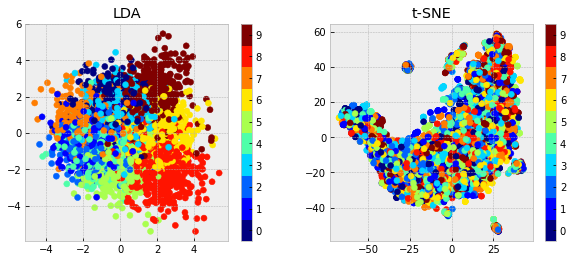

In [9]:
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=t_train, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.title('LDA')

plt.subplot(1,2,2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=t_train, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.title('t-SNE')

# Show the plots
plt.show()

In [10]:
n_components = 9

# Create a pipeline with MinMaxScaler and PCA
lda2 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lda', LinearDiscriminantAnalysis(n_components=n_components)),
])

X_train_transformed = lda2.fit_transform(X_train, t_train)
joblib.dump(lda2,'lda2.pkl')

['lda2.pkl']

Visualize and compare the 2-dimensional projections with PCA

/scratch/local/14520992/ipykernel_2661467/2676026932.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(ticks=range(10))


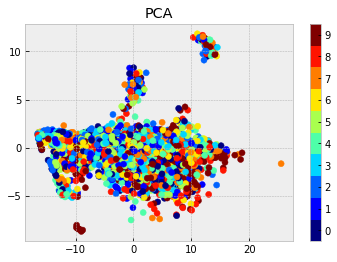

In [11]:
pca2 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=2))
])

X_pca = pca2.fit_transform(X_train)
joblib.dump(pca2,'pca2.pkl')

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=t_train, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5); 
plt.title('PCA');

**4. Implement at least 3 manifold learning algorithms for reducing the dimensionality of the feature space. Utilize the new lower-dimensional feature space to build a classifier.**

In [12]:
# Use appropriate n_components for each
n_components = 60

# MDS
mds = MDS(n_components=n_components)
X_train_mds = mds.fit_transform(X_train)
joblib.dump(mds,'mds.pkl')

# Isomap
isomap = Isomap(n_components=n_components)
X_train_isomap = isomap.fit_transform(X_train)
joblib.dump(isomap,'isomap.pkl')

# LLE
lle = LocallyLinearEmbedding(n_components=n_components)
X_train_lle = lle.fit_transform(X_train)
joblib.dump(lle,'lle.pkl')

# SVC pipeline that use MinMax scaler and 'rbf' for SVC kernel
svc_m = Pipeline([
    ('scaler', MinMaxScaler()), 
    ('svc', SVC(kernel='rbf')) 
])
svc_m.fit(X_train_mds, t_train)

svc_i = Pipeline([
    ('scaler', MinMaxScaler()),  
    ('svc', SVC(kernel='rbf')) 
])
svc_i.fit(X_train_isomap, t_train)

svc_l = Pipeline([
    ('scaler', MinMaxScaler()), 
    ('svc', SVC(kernel='rbf'))
])
svc_l.fit(X_train_lle, t_train)

/apps/python/3.10/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:348: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/apps/python/3.10/lib/python3.10/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/apps/python/3.10/lib/python3.10/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/apps/python/3.10/lib/python3.10/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Pipeline(steps=[('scaler', MinMaxScaler()), ('svc', SVC())])

Create parameter grids for grid search

In [13]:
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': [0.01, 0.1, 1, 10, 100]
}

# MDS
grid_search_mds = GridSearchCV(svc_m, param_grid, cv=10, n_jobs=-1)
grid_search_mds.fit(X_train_mds, t_train)

# Isomap
grid_search_isomap = GridSearchCV(svc_i, param_grid, cv=10, n_jobs=-1)
grid_search_isomap.fit(X_train_isomap, t_train)

# LLE
grid_search_lle = GridSearchCV(svc_l, param_grid, cv=10, n_jobs=-1)
grid_search_lle.fit(X_train_lle, t_train)

# Get the best parameters and best estimator for each pipeline
best_params_mds = grid_search_mds.best_params_
svc_mds = grid_search_mds.best_estimator_
joblib.dump(svc_mds,'svc_mds.pkl')

best_params_isomap = grid_search_isomap.best_params_
svc_isomap = grid_search_isomap.best_estimator_
joblib.dump(svc_isomap,'svc_isomap.pkl')

best_params_lle = grid_search_lle.best_params_
svc_lle = grid_search_lle.best_estimator_
joblib.dump(svc_l,'svc_lle.pkl')

print("Best parameters for MDS:", best_params_mds)
print("Best parameters for Isomap:", best_params_isomap)
print("Best parameters for LLE:", best_params_lle)

Best parameters for MDS: {'svc__C': 10, 'svc__gamma': 0.1}
Best parameters for Isomap: {'svc__C': 10, 'svc__gamma': 1}
Best parameters for LLE: {'svc__C': 10, 'svc__gamma': 10}
